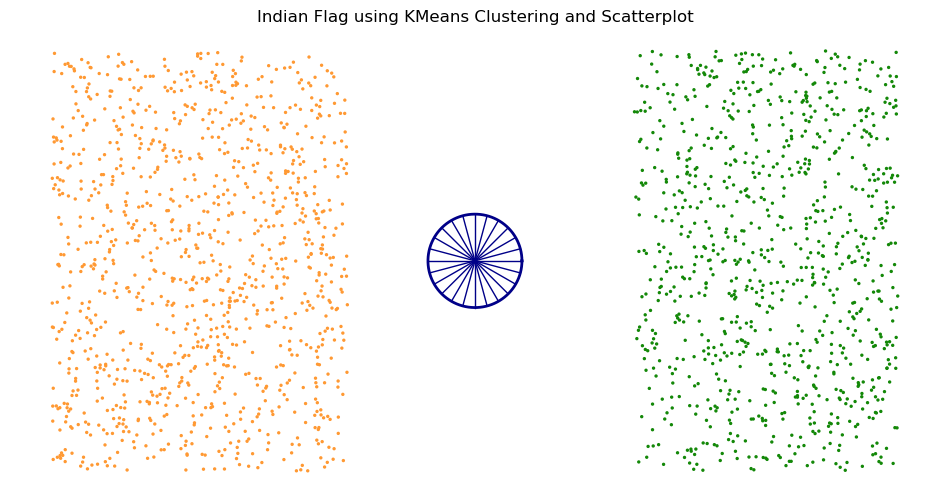

In [42]:
import numpy as np
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

# Generate points for three horizontal bands: saffron, white, green
n_points = 1000
height = 300
width = 600

# Saffron band (top)
saffron_y = np.random.uniform(2*height/3, height, n_points)
saffron_x = np.random.uniform(0, width, n_points)
saffron = np.column_stack((saffron_x, saffron_y))

# White band (middle)
white_y = np.random.uniform(height/3, 2*height/3, n_points)
white_x = np.random.uniform(0, width, n_points)
white = np.column_stack((white_x, white_y))

# Green band (bottom)
green_y = np.random.uniform(0, height/3, n_points)
green_x = np.random.uniform(0, width, n_points)
green = np.column_stack((green_x, green_y))

# Combine all points
X = np.vstack((saffron, white, green))

# KMeans clustering (3 clusters for 3 colors)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Assign colors based on cluster centers' y position
centers = kmeans.cluster_centers_
sorted_indices = np.argsort(centers[:, 1])
colors = ['#FF9933', 'white', '#138808']  # Saffron, White, Green
cluster_color_map = {sorted_indices[i]: colors[i] for i in range(3)}
point_colors = [cluster_color_map[label] for label in labels]

# Plot the flag
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=point_colors, s=2)

# Draw Ashoka Chakra (blue wheel) in the center
chakra_center = (width/2, height/2)
chakra_radius = height/9
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(chakra_center[0] + chakra_radius * np.cos(theta),
         chakra_center[1] + chakra_radius * np.sin(theta),
         color='#000088', linewidth=2)

# Draw 24 spokes
for i in range(24):
    angle = 2 * np.pi * i / 24
    x_end = chakra_center[0] + chakra_radius * np.cos(angle)
    y_end = chakra_center[1] + chakra_radius * np.sin(angle)
    plt.plot([chakra_center[0], x_end], [chakra_center[1], y_end], color='#000088', linewidth=1)

plt.axis('off')
plt.title('Indian Flag using KMeans Clustering and Scatterplot')
plt.show()